<a href="https://colab.research.google.com/gist/qbeer/6bcdfa258286bdb92f370a6146260795/hw_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

### 1. Load the provided .npy files. You can load it with numpy.

* each file contains one vector, X and y
* visualize X vs y on a scatter plot
* fit an  y=w_0 + w_1⋅X + w_2⋅X^2  linear regression using `sklearn`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/Users/barnabasp/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/barnabasp/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecati

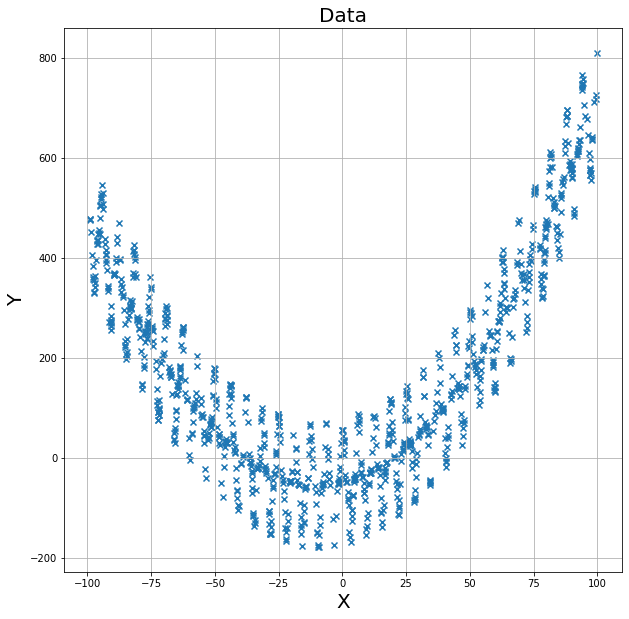

In [2]:
X = np.load('X.npy')
y = np.load('y.npy')
plt.figure(figsize=(10,10))
plt.scatter(X,y, marker='x')
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title('Data', fontsize=20)
plt.grid(True)

In [3]:
dat = np.array((X,X**2)) #no need to add w_0 because we can get it from .intercept_ later
reg = LinearRegression().fit(dat.T,y) #transpose because we need to have them in columns
y_1 = reg.predict(dat.T)

In [4]:
print(dat.T)

[[ -25.09197623  629.60727115]
 [  90.14286128 8125.7354401 ]
 [  46.39878836 2152.84756149]
 ...
 [ -72.63627382 5276.0282739 ]
 [  90.04747076 8108.54699102]
 [ -10.79884541  116.61506215]]


In [5]:
print(reg.intercept_, *reg.coef_)

-47.37293563362087 1.1888763377209406 0.06469683208850045


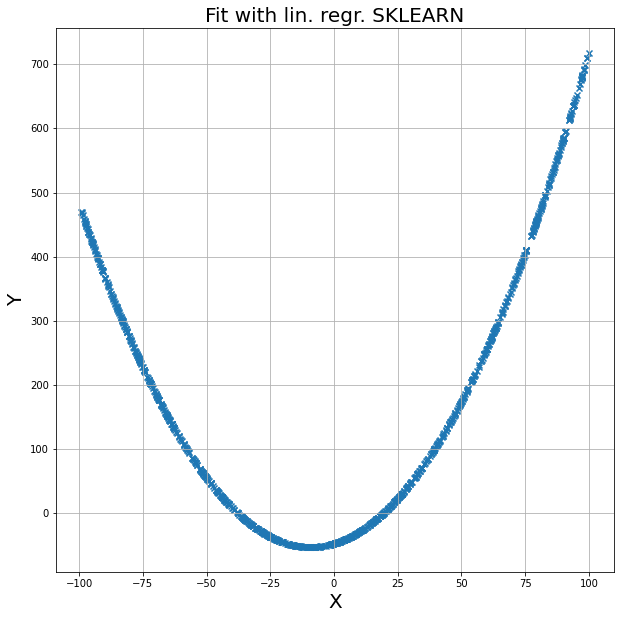

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(X,y_1, marker='x')
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title('Fit with lin. regr. SKLEARN', fontsize=20)
plt.grid(True)

### 2. Using different features

* plot the residuals (the difference between the prediction and the actual  y ) vs the original  y 
* a non-random-noise like pattern suggests non-linear connection between the features and the predictions
* someone told us that the connection between X and y is  y=A⋅X+B⋅cos^3(X)+C⋅X^2+D 
  * using sklearn's linear regression estimate  A,B,C,D !
* plot the residuals again! is it better now?

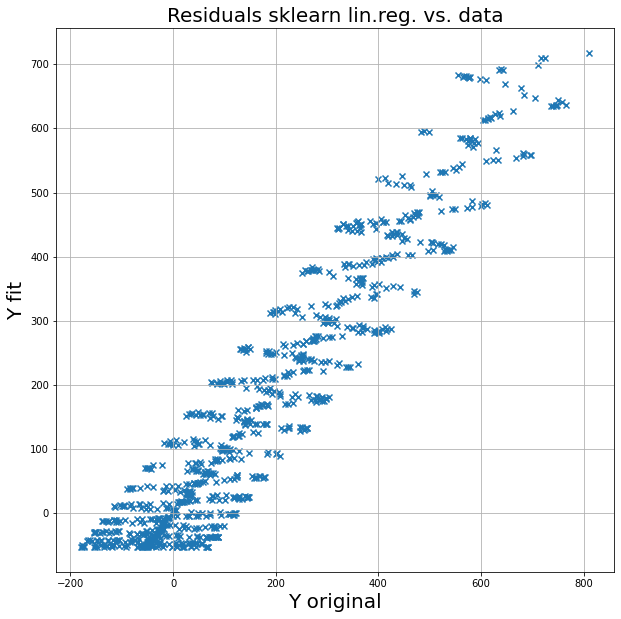

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(y,y_1, marker='x')
plt.xlabel('Y original',fontsize=20)
plt.ylabel('Y fit',fontsize=20)
plt.title('Residuals sklearn lin.reg. vs. data', fontsize=20)
plt.grid(True)

In [8]:
dat_2 = np.array((X**1,np.cos(X)**3,X**2)) #no need to add w_0 because we can get it from .intercept_ later
reg_2 = LinearRegression().fit(dat_2.T,y) #regression based on the data that someone told us suspiciously
y_2 = reg_2.predict(dat_2.T)

In [9]:
print(dat_2.T)

[[-2.50919762e+01  9.97509738e-01  6.29607271e+02]
 [ 9.01428613e+01 -1.85966482e-01  8.12573544e+03]
 [ 4.63987884e+01 -4.19234778e-01  2.15284756e+03]
 ...
 [-7.26362738e+01 -8.01239806e-01  5.27602827e+03]
 [ 9.00474708e+01 -1.17642962e-01  8.10854699e+03]
 [-1.07988454e+01 -7.46774358e-03  1.16615062e+02]]


In [10]:
print(*reg_2.coef_, reg_2.intercept_)

1.1967685256358913 123.56766140052731 0.06569863215577243 -50.071092692618095


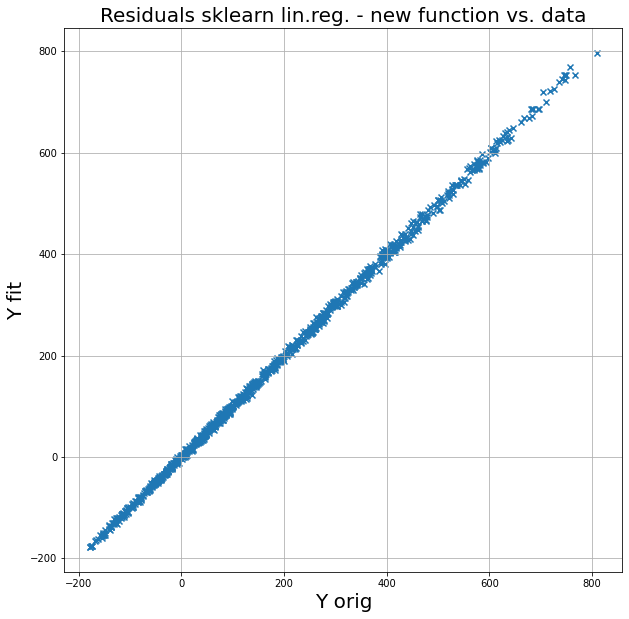

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(y,y_2, marker='x')
plt.xlabel('Y orig',fontsize=20)
plt.ylabel('Y fit',fontsize=20)
plt.title('Residuals sklearn lin.reg. - new function vs. data', fontsize=20)
plt.grid(True)

### 3. Other methdods than sklearn for linear regression

* using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
* is the result the same? if not guess, why? (did you not forget to add the constant term?)
* try to get the same results with statsmodels as with sklearn!
* using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?

In [12]:
import statsmodels.api as sm

/Users/barnabasp/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
X_3 = sm.add_constant((X**1,np.cos(X)**3,X**2,X**0))

In [14]:
print(X_3)

[[ 1.00000000e+00 -2.50919762e+01  9.01428613e+01 ... -7.26362738e+01
   9.00474708e+01 -1.07988454e+01]
 [ 1.00000000e+00  9.97509738e-01 -1.85966482e-01 ... -8.01239806e-01
  -1.17642962e-01 -7.46774358e-03]
 [ 1.00000000e+00  6.29607271e+02  8.12573544e+03 ...  5.27602827e+03
   8.10854699e+03  1.16615062e+02]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]]


In [15]:
print(np.shape(X), np.shape(X_3))

(1000,) (4, 1001)


In [16]:
X_3 = np.delete(X_3.T,0,0)

In [17]:
X_3[0,0:3] == dat_2.T[0]

array([ True,  True,  True])

In [18]:
model = sm.OLS(y,X_3)
result = model.fit()
print(*result.params)

1.196768525635816 123.56766140053406 0.06569863215578076 -50.07109269259267


In [19]:
dat_3 = np.array((X**1,np.cos(X)**3,X**2, X**0)) #no need to add w_0 because we can get it from .intercept_ later
XX = dat_3.T

In [20]:
analytic_coeff = np.matmul(np.linalg.inv(np.matmul(XX.T,XX)),np.matmul(XX.T,y))
print(*analytic_coeff)

1.1967685256358687 123.56766140052807 0.06569863215576491 -50.071092692592515


### 4.

* load the [real_estate](https://gist.github.com/qbeer/f356d7144543cbb09c9792c34b8ad722) data to a pandas dataframe
drop the ID column and the geographic location columns
fit a linear regression model to predict the unit price using sklearn

In [21]:
df = pd.read_csv('real_estate.csv',usecols=[1,2,3,4,7])
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5


In [22]:
X_df = df[df.columns[0:4]]
Y_df = df[df.columns[4]]

In [23]:
Y_val = Y_df.values
X_val = X_df.values

In [24]:
reg_df = LinearRegression().fit(X_val,Y_val) 
y_df = reg_df.predict(X_val)

In [25]:
print(*reg_df.coef_,reg_df.intercept_)

5.778042819976151 -0.2544779730862607 -0.005512996980547524 1.2578641003854663 -11588.747800126179


### 5.

* interpret the coefficients and their meaning shortly with your own words
* plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?

---

The Y functions looks like the following:
Y price = $5.78 \cdot X_1$ transaction date $+ (-0.25) \cdot X_2$ house age $+ (-0.01)\cdot X_3$ distance to MRT (mass rapid transit) $+ 1.26 \cdot X_4$ # convenience stores

Based on the coefficients:
We can see that Y is increased by the number of convenience stores slightly and more with transaction date. House age is slightly decreasing the price, distance to mass rapid transit doesn't count really.

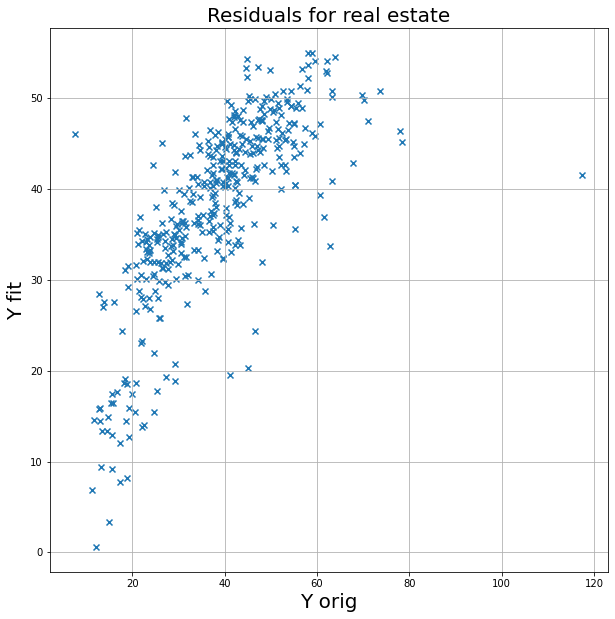

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(Y_val,y_df, marker='x')
plt.xlabel('Y orig',fontsize=20)
plt.ylabel('Y fit',fontsize=20)
plt.title('Residuals for real estate',fontsize=20)
plt.grid(True)

Let's try to normalise the data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaled_df = StandardScaler().fit_transform(df)

In [45]:
scaled_df

array([[-0.82368321,  1.25562833, -0.79249504,  2.00740743, -0.00590088],
       [-0.82368321,  0.15708622, -0.61661163,  1.66750286,  0.3105072 ],
       [ 1.54115111, -0.38779067, -0.41401527,  0.30788458,  0.6857819 ],
       ...,
       [ 0.35873395,  0.09556786, -0.54967846,  0.98769372,  0.19277396],
       [-0.52896662, -0.84478419, -0.77668389,  0.30788458,  1.06841493],
       [ 1.24643452, -0.98539758, -0.78807071,  1.66750286,  1.90726426]])

In [40]:
X_scval = scaled_df[:,0:4]
Y_scval = scaled_df[:,4]

In [41]:
reg_scdf = LinearRegression().fit(X_scval,Y_scval) 
y_scdf = reg_df.predict(X_scval)

In [44]:
print(*reg_scdf.coef_)

0.11973837953356259 -0.21307014983144235 -0.5113741726133847 0.2723051336332401


The Y functions looks like the following:
Y price = $0.12 \cdot X_1$ transaction date $+ (-0.21) \cdot X_2$ house age $+ (-0.51)\cdot X_3$ distance to MRT (mass rapid transit) $+ 0.27 \cdot X_4$ # convenience stores

Based on the new coefficients:
We can see that Y is increased by the number of convenience stores more and even more with the distance to MRT. Transaction date doesn't really play a role, then the age of the house the next.

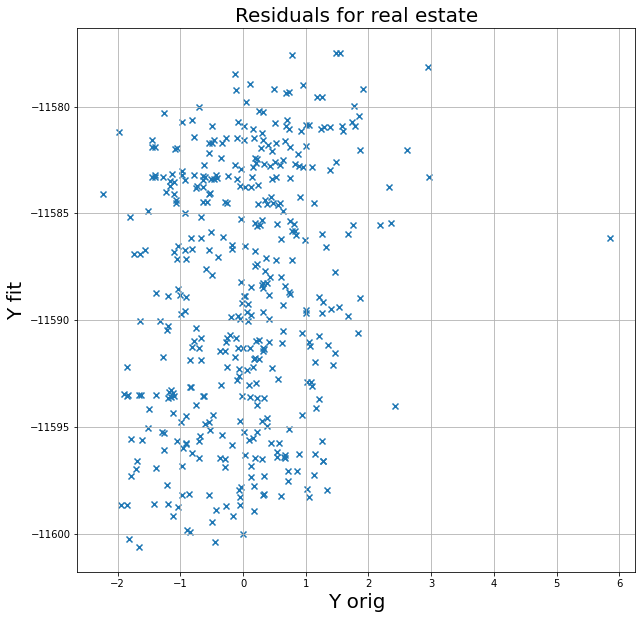

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(Y_scval,y_scdf, marker='x')
plt.xlabel('Y orig',fontsize=20)
plt.ylabel('Y fit',fontsize=20)
plt.title('Residuals for real estate',fontsize=20)
plt.grid(True)

If I had to, I'd select lower right part. As we decrease on the vertical axis we estimate a lower price and on the horizontal the further we are to the right, the more expensive are the houses really. So if this was used to price in the houses, we could get cheaper price for better value

## Hints:

* On total you can get 10 points for fully completing all tasks.
* Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
* Comments you code when necessary
* Write functions for repetitive tasks!
* Use the pandas package for data loading and handling
* Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
* Use the scikit learn package for almost everything
* Use for loops only if it is really necessary!
* Code sharing is not allowed between student! Sharing code will result in zero points.
* If you use code found on web, it is OK, but, make its source clear!